In [964]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split 
from scipy.stats import chi2_contingency
from itertools import combinations
import scipy.stats as stats


In [965]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [966]:
# loading the dataset
df = pd.read_csv("salary.csv")

# Exploring Dataset

In [967]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [968]:
# Finding the how much rows and columns dataset have
df.shape

(956, 16)

In [969]:
# Which are all columns we have lets gonna be see
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors'],
      dtype='object')

In [970]:
# Lets check the datatypes
df.dtypes

Unnamed: 0.1           int64
Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [971]:
# Get Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       956 non-null    int64  
 1   Unnamed: 0         956 non-null    int64  
 2   Job Title          956 non-null    object 
 3   Salary Estimate    956 non-null    object 
 4   Job Description    956 non-null    object 
 5   Rating             956 non-null    float64
 6   Company Name       956 non-null    object 
 7   Location           956 non-null    object 
 8   Headquarters       956 non-null    object 
 9   Size               956 non-null    object 
 10  Founded            956 non-null    int64  
 11  Type of ownership  956 non-null    object 
 12  Industry           956 non-null    object 
 13  Sector             956 non-null    object 
 14  Revenue            956 non-null    object 
 15  Competitors        956 non-null    object 
dtypes: float64(1), int64(3), o

In [972]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000,956.000000
mean,477.500000,477.500000,3.601255,1774.605649
std,276.117729,276.117729,1.067619,598.942517
min,0.000000,0.000000,-1.000000,-1.000000
25%,238.750000,238.750000,3.300000,1937.000000
50%,477.500000,477.500000,3.800000,1992.000000
75%,716.250000,716.250000,4.200000,2008.000000
max,955.000000,955.000000,5.000000,2019.000000


Note : We can see there are -1 values in min section. These values might be NAN so we need to remove these

# Exploratory Data Analysis & Data Cleaning

1. Plotting bargraphs and countplots for numerical and categorical features respectively.
2. Removing unwanted columns
3. Handling NaN/missing values
4. Removing unwanted alphabet/special characters from the features

In [973]:
# Removing Unwanted column
print('Shape before moving:{}'.format(df.shape))
df.drop(labels=['Unnamed: 0'],axis='columns',inplace=True)
print('Shape before moving:{}'.format(df.shape))

Shape before moving:(956, 16)
Shape before moving:(956, 15)


In [974]:
# Import Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Sayan Paul\AppData\Local\Temp\ipykernel_15912\2197512990.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Rating'])


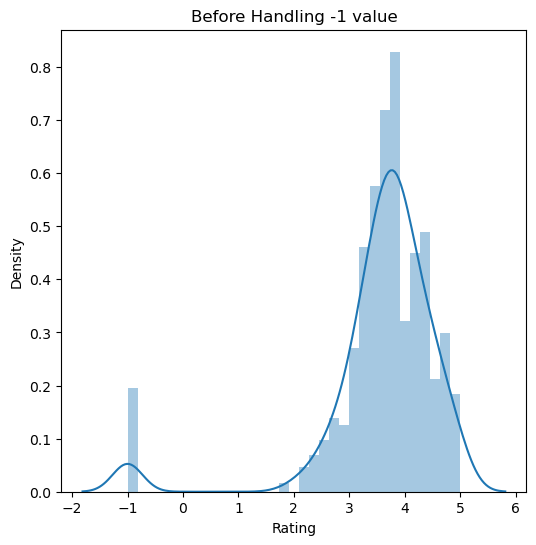

In [975]:
# Visualising 'Rating' column
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('Before Handling -1 value')

Note: Since the Rating feature follows the Gaussian/Normal Distribution, we'll replace -1 values with mean of the distribution.

In [976]:
df['Rating'].min()

-1.0

In [977]:
# Handling -1. Values in Rating column
df['Rating'] = df['Rating'].apply(lambda x: np.NaN if x==-1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

C:\Users\Sayan Paul\AppData\Local\Temp\ipykernel_15912\4292309947.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Rating'])


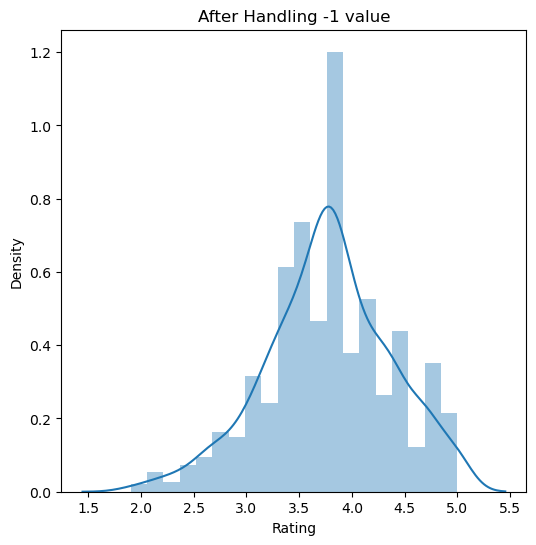

In [978]:
# Visualising 'Rating' column
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('After Handling -1 value')

Text(0, 0.5, 'Rating')

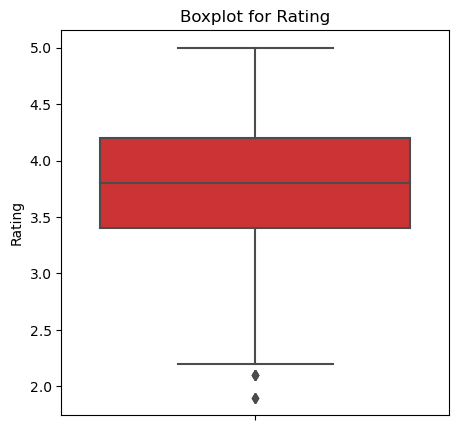

In [979]:
# Lets Check outliers in 'Rating' Column
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating',data=df,orient='v',palette='Set1')
plt.title('Boxplot for Rating')
plt.ylabel('Rating')

C:\Users\Sayan Paul\AppData\Local\Temp\ipykernel_15912\3808992330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['Founded'])


Text(0.5, 1.0, 'Before handling -1 value')

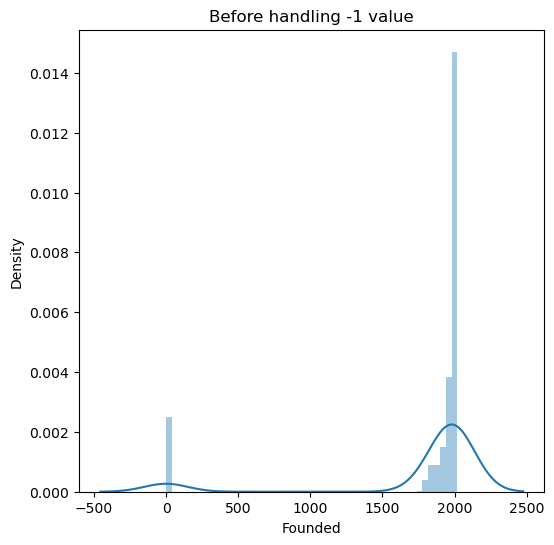

In [980]:
# Visualising the 'Founded' Column
plt.figure(figsize=(6,6))
sns.distplot(a=df['Founded'])
plt.title('Before handling -1 value')

Note: Since Founded feature does not follow Gaussian/Normal distribution but is Right-Skewed graph, we'll replacing the -1 values with median of the distribution.

In [981]:
# Handling -1 values in Founded column
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
df['Founded'] = df['Founded'].astype('int')

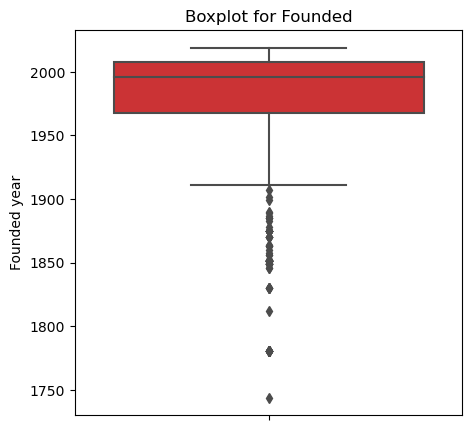

In [982]:
# Lets check the Outliers in Founded
plt.figure(figsize=(5,5))
sns.boxplot(y='Founded', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Founded')
p = plt.ylabel('Founded year')

There are too much outliers

In [983]:
# Lets Clean the 'Job Title' Column
df['Job Title'].value_counts().nlargest(20)

Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  4
Pharmaco

In [984]:
# In this function we just first converted the job role into lower case and then to proper name 
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

In [985]:
# Applying function 
df['job_title']= df['Job Title'].apply(title_cleaner)
df['job_title'].value_counts()

data scientist               560
data engineer                158
data analyst                 105
other                         72
manager                       35
director                      13
machine learning engineer     13
Name: job_title, dtype: int64

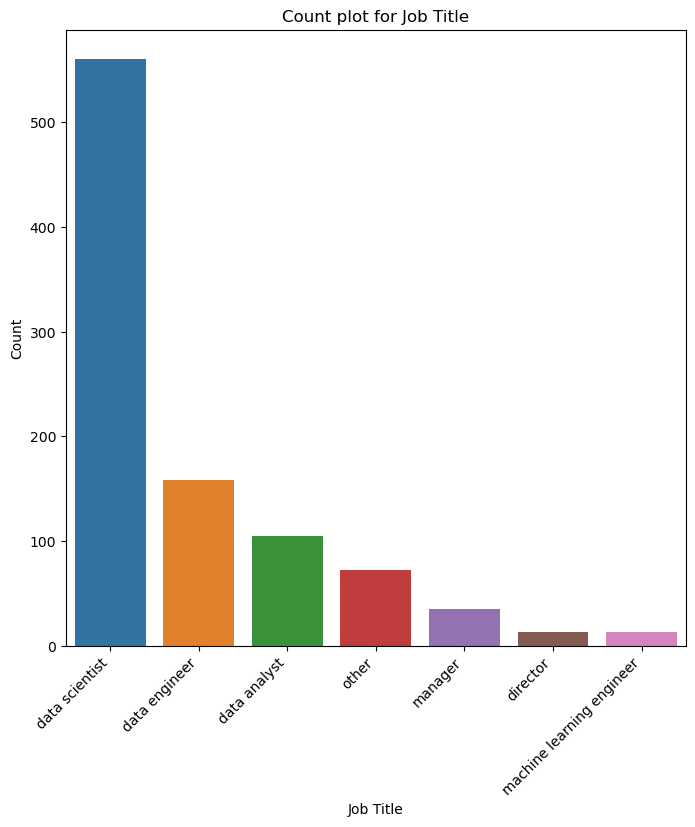

In [986]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_title', data=df, order = df['job_title'].value_counts().index)
p = plt.title('Count plot for Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [987]:
# Lets Check the seniority has high value employers
def title_seniority(title):
    if 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
   
    else:
        return 'jr'

In [988]:
df['job_seniority'] = df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

jr    704
sr    252
Name: job_seniority, dtype: int64

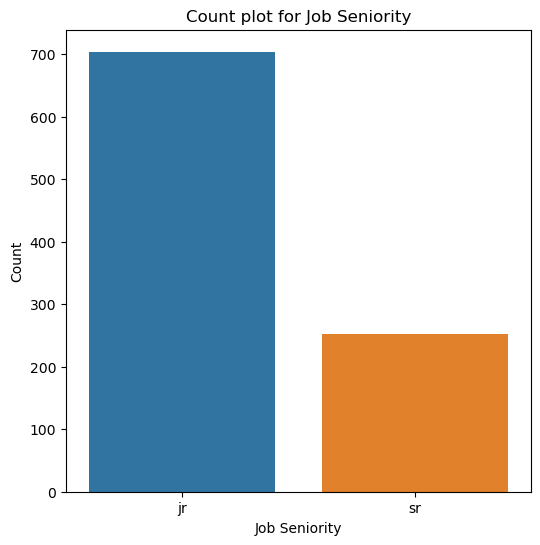

In [989]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='job_seniority', data=df, order = df['job_seniority'].value_counts().index)
p = plt.title('Count plot for Job Seniority')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Count')

In [990]:
# Remove the Job Title Column 
df.drop(labels = ['Job Title'], axis=1 ,inplace =True)

In [991]:
df["Salary Estimate"].value_counts().unique

<bound method Series.unique of -1                                  214
$86K-$143K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$49K-$113K (Glassdoor est.)           6
$21-$34 Per Hour(Glassdoor est.)      6
                                   ... 
$74K-$119K (Glassdoor est.)           1
$55K-$97K (Glassdoor est.)            1
$15K-$16K(Employer est.)              1
$61K-$106K (Glassdoor est.)           1
$62K-$113K (Glassdoor est.)           1
Name: Salary Estimate, Length: 417, dtype: int64>

In [992]:
# Cleaning Salary Estimate column
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [993]:
salary.value_counts()

-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
                   ... 
$74K-$119K            1
$55K-$97K             1
$15K-$16K             1
$61K-$106K            1
$62K-$113K            1
Name: Salary Estimate, Length: 417, dtype: int64

In [994]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [995]:
# Removing '$' and 'K' from 'Salary Estimate' column
salary = salary.apply(lambda x: x if type(x)== type(3.5) else x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [996]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))
salary.unique()[380:]

Length of Salary:  417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

Note: Converting per hour salaries to per year salaries (assuming 45 work hours per week and 52 working weeks), and removing employer_provided_salary from the salary array.

In [997]:
# Removing the string employer provided salary from salary array
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [998]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
  x = minlimit.strip()
  y = maxlimit.strip()
  x = int(int(minlimit)*45*52/1000)
  y = int(int(maxlimit)*45*52/1000)
  return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[:38]

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 '], dtype=object)

C:\Users\Sayan Paul\AppData\Local\Temp\ipykernel_15912\3486946744.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Salary'])


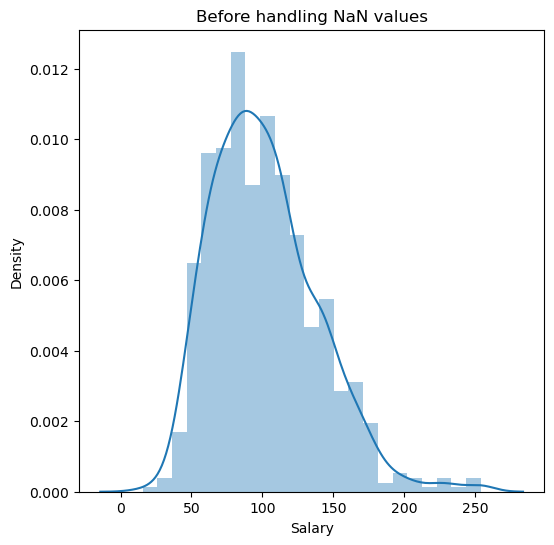

In [999]:
# Creating column for salary i.e. average of the range
df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('Before handling NaN values')

Note: Since the Rating feature follows the Gaussian/Normal Distribution, but since there are few outlies, we'll replace -1 values with median of the distribution.

C:\Users\Sayan Paul\AppData\Local\Temp\ipykernel_15912\3604602387.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Salary'])


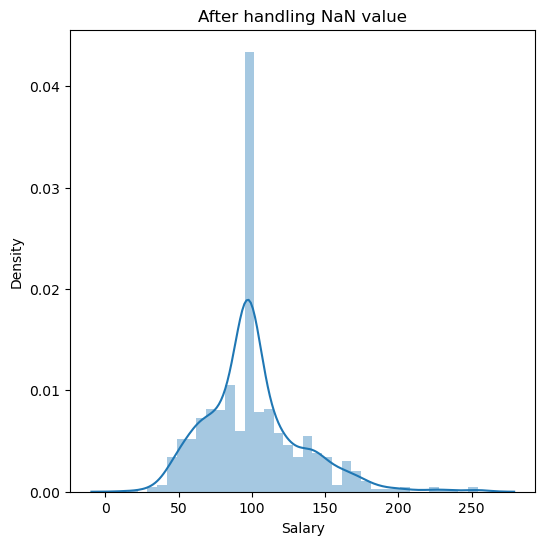

In [1000]:
# Handling NaN values in Salary column
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('After handling NaN value')

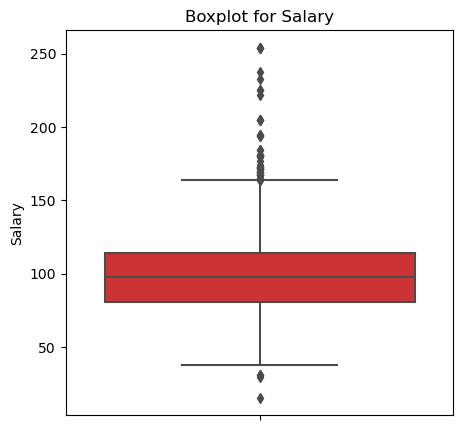

In [1001]:
# Outliers in Salary
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salary', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Salary')
p = plt.ylabel('Salary')

In [1002]:

# Cleaning Company Name column
df["Company Name"] = df['Company Name'].apply(lambda x: x.split("\n")[0])

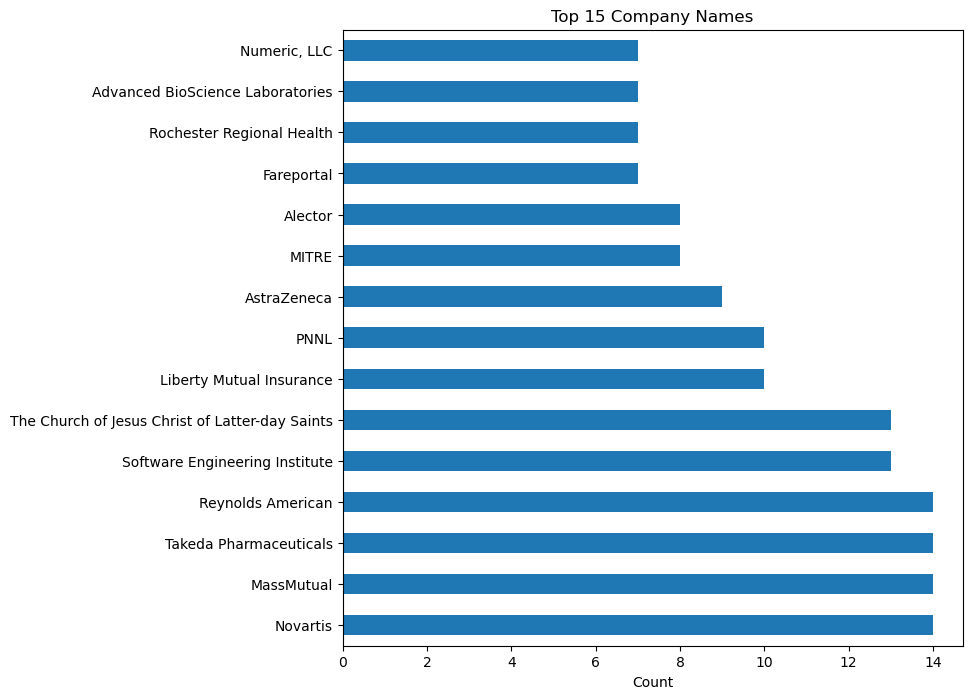

In [1003]:
plt.figure(figsize=(8,8))
g = df["Company Name"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

In [1004]:

# Creating a column 'job_state'
df['job_location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Total number of unique locations: {}'.format(len(df['job_location'].unique())))

Total number of unique locations: 46


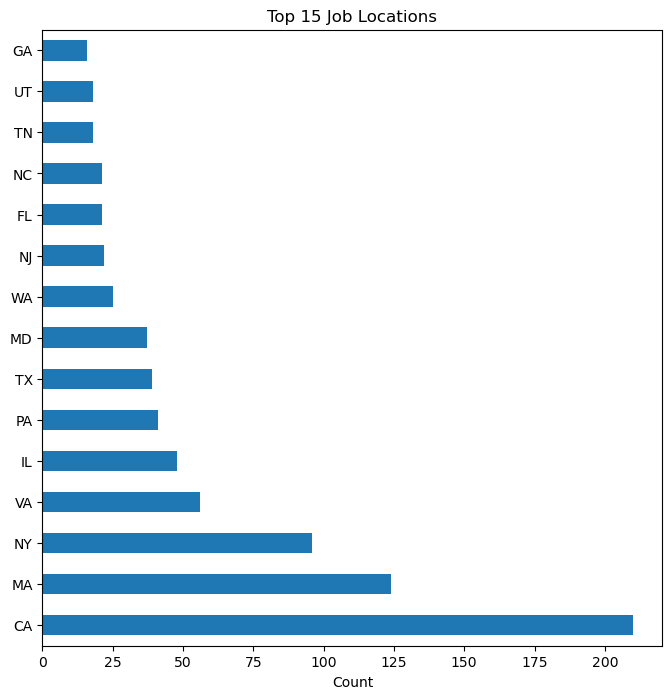

In [1005]:
plt.figure(figsize=(8,8))
g = df["job_location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Job Locations')
p = plt.xlabel('Count')

In [1006]:
df['Size'].value_counts()


1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [1007]:

# Cleaning 'Size' column
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

df['Size'] = df['Size'].apply(size_simplifier)

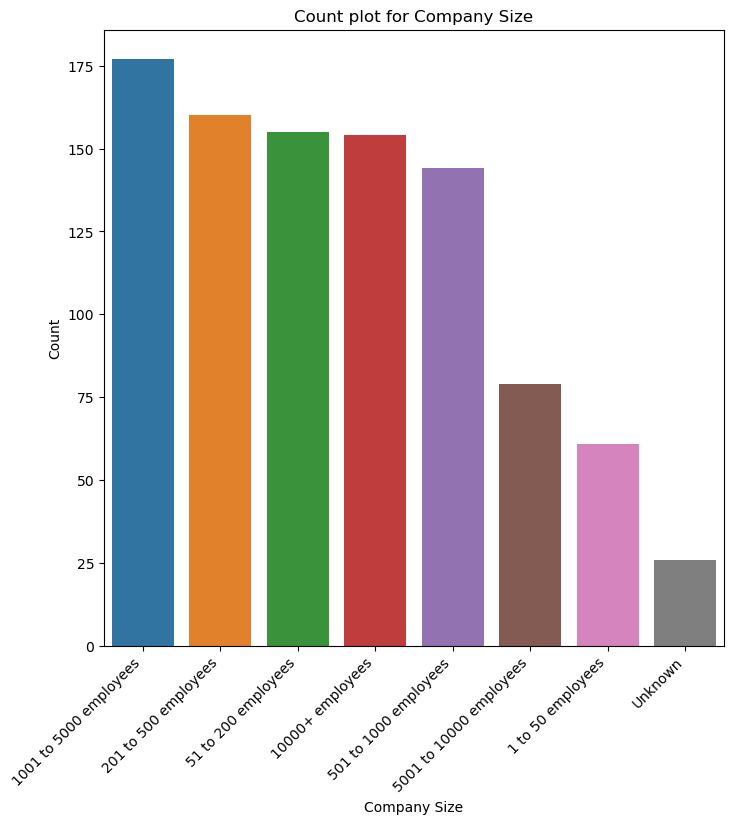

In [1008]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
p = plt.title('Count plot for Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [1009]:
# Cleaning 'Type of Ownership' column
df['Type of ownership'].value_counts()


Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [1010]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
      return 'Other Organization'
    else:
      return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

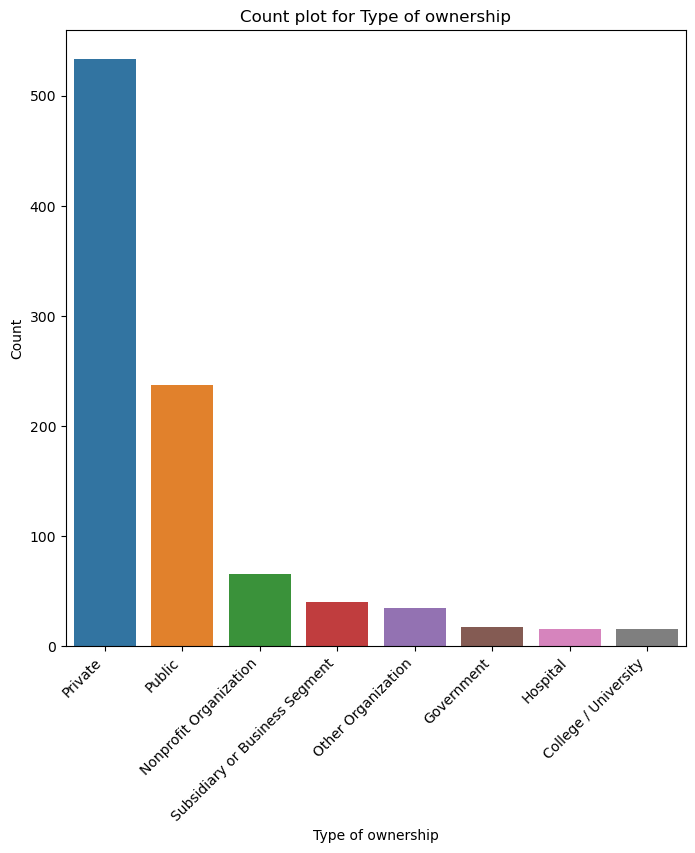

In [1011]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p = plt.title('Count plot for Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [1012]:

# Cleaning 'Industry' column
df['Industry'].value_counts()

Biotech & Pharmaceuticals                   148
IT Services                                  77
Computer Hardware & Software                 70
Insurance Carriers                           65
Enterprise Software & Network Solutions      56
                                           ... 
Farm Support Services                         1
Transportation Equipment Manufacturing        1
Motion Picture Production & Distribution      1
Other Retail Stores                           1
Beauty & Personal Accessories Stores          1
Name: Industry, Length: 63, dtype: int64

In [1013]:
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

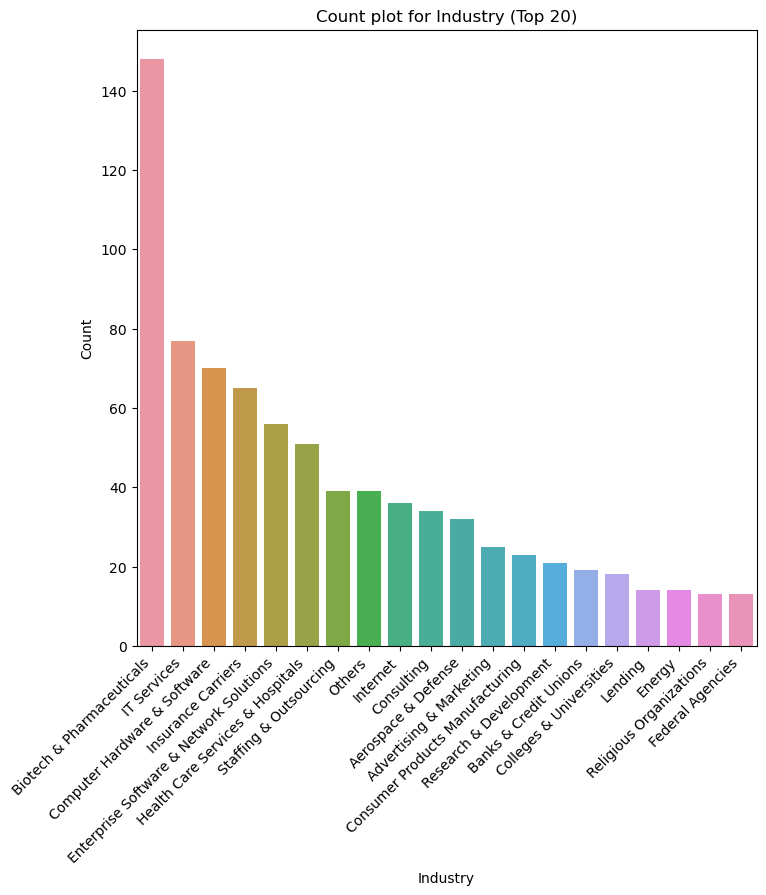

In [1022]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts()[:20].index)
p = plt.title('Count plot for Industry (Top 20)')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [1015]:
# Cleaning 'Sector' column
df['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

In [1016]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

In [1018]:
print(df['Sector'].value_counts())


Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
Others                                 39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

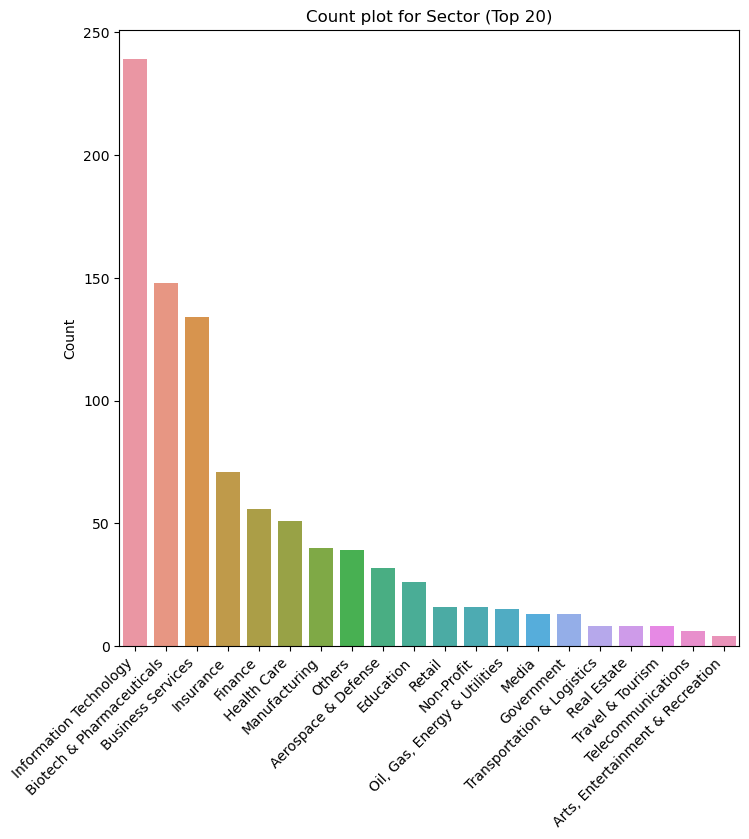

In [1028]:

plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
p = plt.title('Count plot for Sector (Top 20)')
g.set_xlabel('')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [940]:
# Cleaning 'Revenue' column
df['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [941]:

def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text

df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

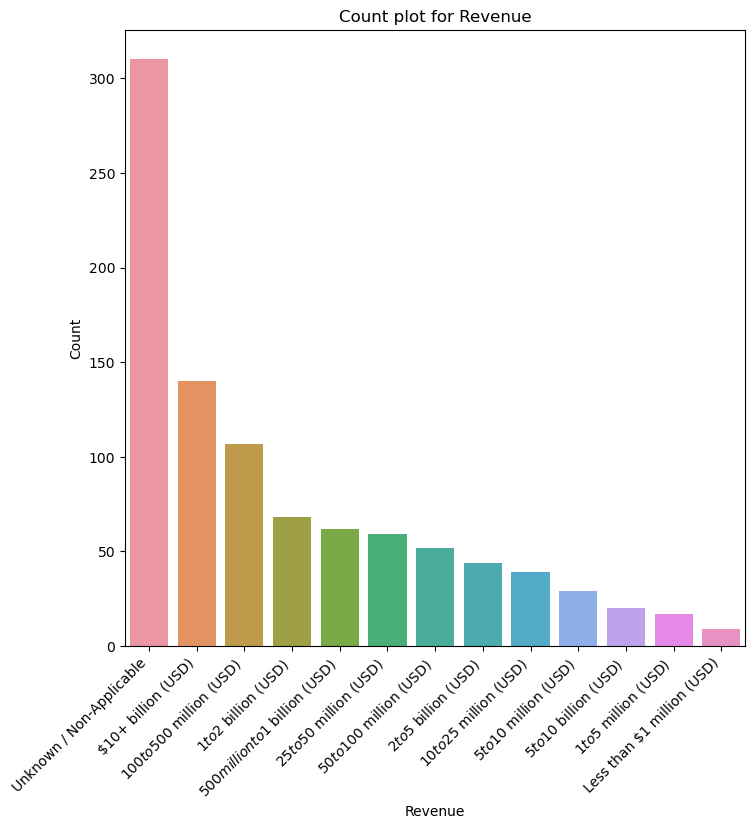

In [942]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [943]:
# Cleaning 'Competitors' column
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
954                                               Slalom
955                                                   -1
Name: Competitors, Length: 956, dtype: object

In [944]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

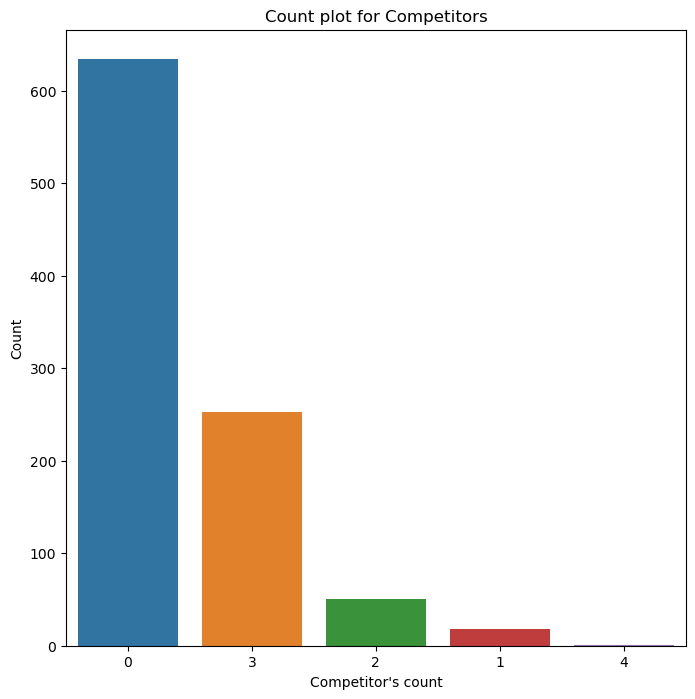

In [945]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
p = plt.title('Count plot for Competitors')
p = plt.xlabel("Competitor's count")
p = plt.ylabel('Count')

C:\Users\Sayan Paul\AppData\Local\Temp\ipykernel_15912\2798535929.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


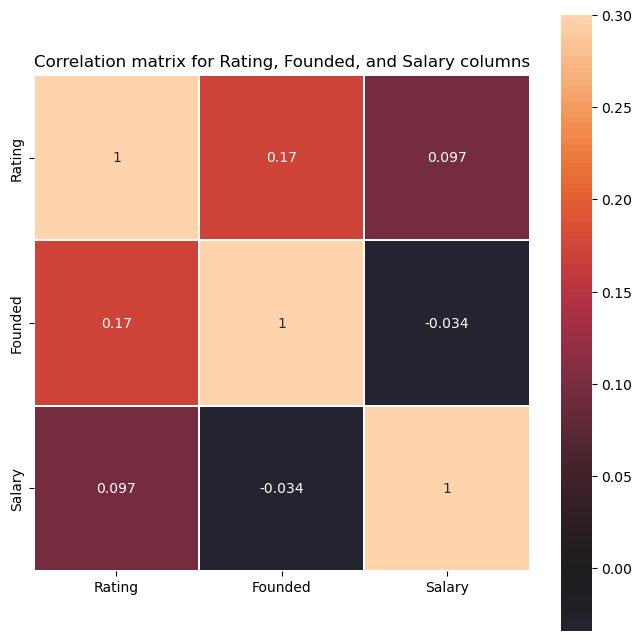

In [946]:
# Finding and plotting the correlation between numerical features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,8))
corr = df[['Rating','Founded','Salary']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, vmax=0.3, center=0, square=True, annot=True, linewidths=0.05)
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')

Insight: Rating-Founded columns have positive correlation, whereas Salary-Founded columns have negative correlation. Also since the correlation is not high amongst all these numerical features, there is no case of multicolliniearity.

In [949]:
df.head()

,Location,Size,Type of ownership,Sector,job_title,job_seniority,Salary
0,"Albuquerque, NM",501 to 1000 employees,Private,Aerospace & Defense,data scientist,jr,72.0
1,"Linthicum, MD",10000+ employees,Other Organization,Health Care,data scientist,jr,87.5
2,"Clearwater, FL",501 to 1000 employees,Private,Business Services,data scientist,jr,85.0
3,"Richland, WA",1001 to 5000 employees,Government,"Oil, Gas, Energy & Utilities",data scientist,jr,76.5
4,"New York, NY",51 to 200 employees,Private,Business Services,data scientist,jr,114.5


dropping unwanted columns

In [948]:
df.drop(["Unnamed: 0.1","Salary Estimate","Job Description","Company Name","Rating","Headquarters","Founded"
         ,"Industry","Revenue","Competitors","job_location"],axis = 1, inplace = True)

In [859]:
df.head()

,Location,Size,Type of ownership,Sector,job_title,job_seniority,Salary
0,"Albuquerque, NM",501 to 1000 employees,Private,Aerospace & Defense,data scientist,jr,72.0
1,"Linthicum, MD",10000+ employees,Other Organization,Health Care,data scientist,jr,87.5
2,"Clearwater, FL",501 to 1000 employees,Private,Business Services,data scientist,jr,85.0
3,"Richland, WA",1001 to 5000 employees,Government,"Oil, Gas, Energy & Utilities",data scientist,jr,76.5
4,"New York, NY",51 to 200 employees,Private,Business Services,data scientist,jr,114.5


In [950]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [951]:
country_map = shorten_categories(df.Location.value_counts(), 20)
df['Location'] = df['Location'].map(country_map)
df.Location.value_counts()

Other                687
New York, NY          78
San Francisco, CA     71
Cambridge, MA         59
Chicago, IL           37
Boston, MA            24
Name: Location, dtype: int64

In [952]:
df = df[df['Location'] != 'Other']


In [953]:
df.Location.value_counts()

New York, NY         78
San Francisco, CA    71
Cambridge, MA        59
Chicago, IL          37
Boston, MA           24
Name: Location, dtype: int64

In [959]:
df["job_seniority"].unique()

array(['jr', 'sr'], dtype=object)

# Encoding the categorical variable

In [864]:
from sklearn.preprocessing import LabelEncoder
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])
df["Location"].unique()

array([3, 1, 4, 2, 0])

In [865]:
le_size = LabelEncoder()
df['Size'] = le_size.fit_transform(df['Size'])
df["Size"].unique()

array([6, 1, 5, 3, 2, 4, 0, 7])

In [866]:
le_ownership = LabelEncoder()
df['Type of ownership'] = le_ownership.fit_transform(df['Type of ownership'])
df["Type of ownership"].unique()

array([3, 4, 2, 5, 1, 0])

In [867]:
le_sector = LabelEncoder()
df['Sector'] = le_sector.fit_transform(df['Sector'])
df["Sector"].unique()

array([ 1,  8,  0, 15, 13,  9,  7, 12, 11, 16, 14,  6,  5,  2, 10,  4,  3])

In [868]:
le_title = LabelEncoder()
df['job_title'] = le_title.fit_transform(df['job_title'])
df["job_title"].unique()

array([2, 0, 1, 4, 5, 6, 3])

In [869]:
le_seniority = LabelEncoder()
df['job_seniority'] = le_seniority.fit_transform(df['job_seniority'])
df["job_seniority"].unique()

array([0, 1])

In [870]:
df.head()

,Location,Size,Type of ownership,Sector,job_title,job_seniority,Salary
4,3,6,3,1,2,0,114.5
9,3,6,3,8,2,0,140.0
14,1,1,4,0,2,0,113.5
16,1,6,4,0,2,0,102.0
18,4,6,3,8,2,0,142.5


# Model Building & Evaluation

In [871]:
from sklearn.model_selection import cross_val_score

In [872]:
X = df.drop("Salary",axis=1)  # Feature matrix
y = df["Salary"]   # Target variable

In [873]:
X_train, X_test, y_train, y_test = train_test_split(     # Splitting the dataset into Training and Test dataset and setting the size of the test dataset = 25% of the original dataset
    X,
    y,
    test_size=0.25,
    random_state=0)

X_train.shape, X_test.shape

((201, 6), (68, 6))

In [874]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -34.601 ---
Standard Deviation: 7.05


In [875]:
# Fitting Lasso Regression to the Training set
from sklearn.linear_model import Lasso
lasso = Lasso()
cv = cross_val_score(lasso, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -34.688 ---
Standard Deviation: 7.571


In [876]:

# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -26.517 ---
Standard Deviation: 6.851


In [877]:
# Fitting Gradient Boosting to the Training set
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.876 ---
Standard Deviation: 8.011


Note: Random Forest is selected amongst all the other algorithms because they have the highest value for Negative Root Mean Squared Error (NRMSE) i.e. lowest value for Root Mean Squared Error (RMSE) metric

In [878]:
X = np.array([["New York, NY", '10000+ employees', 'Private' ,'Health Care','data scientist','jr']])
X

array([['New York, NY', '10000+ employees', 'Private', 'Health Care',
        'data scientist', 'jr']], dtype='<U16')

In [879]:
X[:, 0] = le_location.transform(X[:,0])
X[:, 1] = le_size.transform(X[:,1])
X[:, 2] = le_ownership.transform(X[:,2])
X[:, 3] = le_sector.transform(X[:,3])
X[:, 4] = le_title.transform(X[:,4])
X[:, 5] = le_seniority.transform(X[:,5])
X = X.astype(float)
X

array([[3., 1., 3., 7., 2., 0.]])

In [880]:
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [881]:
y_pred = random_forest_reg.predict(X)
y_pred

C:\Users\Sayan Paul\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([113.895])

In [882]:
import pickle

In [883]:
data = {"model": random_forest_reg, "le_location": le_location, "le_size": le_size,"le_ownership":le_ownership,
        "le_sector":le_sector,"le_title":le_title,"le_seniority":le_seniority}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [884]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_location = data["le_location"]
le_size = data["le_size"]
le_ownership = data["le_ownership"]
le_sector = data["le_sector"]
le_title = data["le_title"]
le_seniority = data["le_seniority"]

In [885]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\Sayan Paul\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([113.895])